# Projet Little Sister V2.
### La société "Little Sister" est une entreprise spécialisée dans le secteur de la vidéosurveillance. Elle revient vers vous afin d'améliorer l'algorithme que vous lui avez précédemment fourni.

### La performance de ce modèle ne répond aujourd'hui pas aux espérances de la société. Il faut donc tout d'abord **analyser la performance d'un modèle sans préprocessing** et essayer d'améliorer la qualité du modèle avec du préprocessing (ici data augmentation).

## Imports et paramètrage

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from classes.functions import functions

Using TensorFlow backend.


In [2]:
# Chemins du projet
MODELS_ROOT = "models/"

# Initialisation
fc = functions()

# Autres paramètres
epochs = 15
img_size = 32
batch_size = 64

## Import et traitement des images d'entraînement/test avant leur utilisation

In [3]:
# Import et split
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

label:  [6]


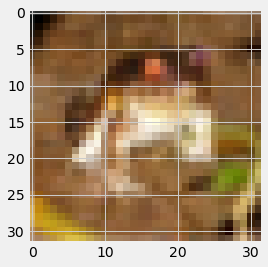

In [4]:
# Affichage de la première image du jeu d'entraînement
plt.imshow(X_train[0])
print("label: ", y_train[0])

In [5]:
# Verrification de la taille des images
# (spoiler: la taille est bonne, pas besoin de les resize étant donné que je veux travailler sur des images 32x32)
X_train[0].shape

(32, 32, 3)

In [6]:
# Catégorisation (A chaque image, attribue un binaire pour chaque label - 1 quand c'est le bon label)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# Exemple sur la première image
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Création d'un modèle basique

### Création :

In [7]:
# Création d'un modèle séquentiel qui se résume à une pile linéaire de couches
model = Sequential()

model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(125, kernel_size=(3,3), strides=(2,2), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 125)       56375     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 125)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                80010     
Total params: 137,785
Trainable params: 137,785
Non-trainable params: 0
________________________________________________

### Entraînement :

In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Entraînement du modèle
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 248s 5ms/step - loss: 2.1343 - accuracy: 0.4083 - val_loss: 1.3967 - val_accuracy: 0.5094
Epoch 2/15
50000/50000 [==============================] - 232s 5ms/step - loss: 1.3182 - accuracy: 0.5379 - val_loss: 1.3702 - val_accuracy: 0.5386
Epoch 3/15
50000/50000 [==============================] - 231s 5ms/step - loss: 1.2112 - accuracy: 0.5801 - val_loss: 1.1437 - val_accuracy: 0.5994
Epoch 4/15
50000/50000 [==============================] - 232s 5ms/step - loss: 1.1447 - accuracy: 0.6016 - val_loss: 1.2053 - val_accuracy: 0.5860
Epoch 5/15
50000/50000 [==============================] - 231s 5ms/step - loss: 1.1000 - accuracy: 0.6175 - val_loss: 1.1607 - val_accuracy: 0.5989
Epoch 6/15
50000/50000 [==============================] - 235s 5ms/step - loss: 1.0459 - accuracy: 0.6368 - val_loss: 1.1193 - val_accuracy: 0.6140
Epoch 7/15
50000/50000 [==============================] - 232s

### Evaluation + sauvegarde :

In [9]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Test de pertes:", score[0], "\nTest de précision:", score[1])

model.save(MODELS_ROOT + "model1.h5")
print("Modèle enregistré!")

Test de pertes: 0.6251835631752014 
Test de précision: 0.7870799899101257
Modèle enregistré!


### Test du modèle :

In [10]:
# Test de prédiction sur les 4 premières images du jeu de test
model.predict(X_val[:4])

array([[4.0993080e-03, 2.4060878e-07, 1.0122477e-02, 1.4722218e-01,
        1.2877695e-03, 4.2143318e-01, 2.5366843e-03, 1.5609043e-04,
        4.1313142e-01, 1.0617196e-05],
       [5.8291666e-04, 1.1258354e-02, 1.8609750e-08, 7.4052582e-09,
        4.7158046e-12, 3.7430583e-09, 3.6286960e-11, 1.3102869e-11,
        9.8695135e-01, 1.2074086e-03],
       [1.7386708e-02, 2.5543082e-01, 2.7883315e-04, 5.7238800e-04,
        8.0531143e-04, 4.6649363e-04, 5.6649846e-05, 1.9828654e-03,
        6.8114352e-01, 4.1876450e-02],
       [5.3003043e-01, 4.2925116e-01, 5.8457430e-04, 2.2933720e-05,
        1.4372607e-05, 1.7701392e-06, 1.6860215e-05, 2.9225088e-05,
        3.9045073e-02, 1.0035449e-03]], dtype=float32)

In [11]:
# Valeurs réelles
y_val[:4]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


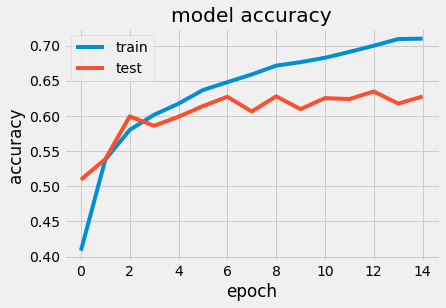

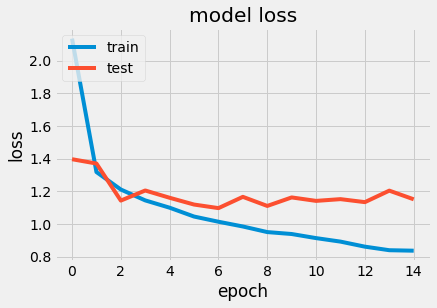

In [12]:
# list all data in history
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Ajout de data augmentation

### Création :

### Entraînement :

### Test : 